# Lojistik Regresyon
Lojistik regresyon, siniflandirma problemlerini çözmek için kullandiğimiz bir tekniktir. Diyelim ki elimizde bir grup öğrencinin sinav notlari ve bu öğrencilerin sinavi geçip geçmediği bilgisi var. Lojistik regresyon, bu verileri kullanarak bir öğrencinin sinavi geçme olasiliğini tahmin etmemize yardimci olur.

Bu tahminleri yaparken, her öğrenci için bir olasilik hesaplariz. Örneğin, bir öğrencinin sinavi geçme olasiliği %80 ise, o öğrencinin sinavi geçme olasiliğini yüksek buluruz. Ancak bir öğrencinin sinavi geçme olasiliği %20 ise, bu öğrencinin sinavi geçme olasiliğini düşük buluruz.

Lojistik regresyon, verileri analiz ederken kullanilan bir araçtir ve siniflandirma problemlerinde yaygin olarak kullanilir. Öğrencilerin anlamasi için, bir öğrencinin sinavi geçme olasiliğini tahmin etmek için bir matematiksel model oluşturduğumuzu düşünebilirsiniz. Bu model, öğrencinin sinav notlarina dayanarak sinavi geçme olasiliğini hesaplar.


1. **Giriş:**
    - Lineer regresyon siniflandirma için uygun değildir.
    - Siniflandirma için logistic regresyon kullaniriz.
    - Logistic regresyon, lineer regresyon ile logistic fonksiyonun (softmax) birleştirilmesiyle elde edilir. 

2. **Logistic Regresyon Adimlari:**
    1. Kütüphanelerin İçeri Aktarilmasi
    2. Veri Kümesinin Hazirlanmasi
        - MNIST veri kümesi kullanilir.
        - 28x28 boyutunda görüntüler ve 0'dan 9'a kadar 10 etiket bulunur.
        - Veri normalleştirilmemiştir, bu nedenle her bir görüntüyü 255'e böleriz, bu temel bir görüntü normalizasyonudur.
        - Veriyi bölmek için sklearn kütüphanesinden train_test_split yöntemini kullaniriz.
        - Eğitim verisinin boyutu %80 ve test verisinin boyutu %20'dir.
        - Özellik ve hedef tensörleri oluşturulur. Bir sonraki bölümlerde bu tensörlerden değişken oluşturacağiz. Hatirlarsaniz, gradyanlarin birikimi için değişken tanimlamamiz gerekiyor.
        - Batch boyutu: Örneklerin grup boyutu. Örneğin, veri kümemiz 1000 örneği içeriyorsa, bu 1000 örneği ayni anda eğitebiliriz veya 100 örneği içeren 10 grup oluşturarak bölüp gruplari sirayla eğitebiliriz. Batch boyutu grup boyutudur. Örneğin, batch_size = 100 seçtiğimizde, tüm verileri sadece bir kez eğitmek için 336 grup oluşur. Her biri 100 örnek içeren (quota) batch_size'a sahip 336 grup eğitiriz. Sonunda 33600 örneği bir kez eğitiriz.
        - Epoch (Dönem): 1 epoch, tüm örneklerin bir kez eğitilmesi anlamina gelir.
        - Örneğimizde: Eğitilecek 33600 örneğimiz var ve batch_size'inin 100 olduğunu ve epoch'un 29 olduğunu belirledik (doğruluk, epoch 29 olduğunda neredeyse en yüksek değeri elde eder). Veri 29 kez eğitilir. İhtiyacim olan iterasyon sayisi kaçtir? Hesaplayalim:
            - Eğitim verisi 1 kez eğitilir = 33600 örneği eğitiriz (çünkü veri 33600 örnek içerir)
            - Ancak verimizi 336 grup (grup boyutu = batch_size = 100) olarak böleriz.
            - Bu nedenle, 1 dönem (eğitim verisini sadece bir kez eğitmek) 336 iterasyon alir.
            - 29 dönemimiz var, bu yüzden toplam iterasyon sayisi 9744'tür (benim kullandiğim neredeyse 10000'dir).
        - TensorDataset(): Tensörleri saran veri kümesi. Her bir örnek, tensörlerin birinci boyutunu dizinleyerek alinir.
        - DataLoader(): Veri kümesini ve örneği birleştirir. Ayrica veri kümesi üzerinde çok işlemli yineler sağlar.
        - Veri kümesindeki görüntülerden birini görselleştirme
    3. **Logistic Regresyon Modelinin Oluşturulmasi**
        - Lineer regresyonla aynidir.
        - Ancak beklendiği gibi modelde bir logistic fonksiyon olmali, değil mi?
        - Pytorch'ta logistic fonksiyon, sonraki bölümlerde kullanacağimiz kayip fonksiyonunda bulunur.
    4. **Modelin Oluşturulmasi**
        - input_dim = 28x28 # görüntü piksel boyutu
        - output_dim = 10  # etiketler 0,1,2,3,4,5,6,7,8,9
        - Modelin oluşturulmasi
    5. **Kayip Fonksiyonunun Oluşturulmasi**
        - Çapraz entropi kaybi
        - Kaybi hesaplar, bu sürpriz değil :)
        - Ayrica içinde softmax (logistic fonksiyonu) bulunur.
    6. **Optimizasyonun Oluşturulmasi**
        - SGD Optimizatörü
    7. **Modelin Eğitilmesi**
    8. **Tahmin**
- Sonuç olarak, grafikten de görebileceğiniz gibi, kayip azalirken, doğruluk (nearly 85%) artiyor ve modelimiz öğreniyor (eğitiliyor).

### Kütüphanelerin import edilmesi

In [9]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Verisetinin yüklenmesi ve hazirlanmasi

Veri seti yüklenir ve özellikler (pikseller) ile etiketler (rakamlar) olarak iki kisma ayrilir. Özellikler, her bir pikselin gri ton değerlerini içerir ve 0 ile 1 arasinda normalleştirilir. 

Daha sonra, veri seti eğitim ve test kümelerine bölünür. Eğitim kümesi, modelin öğrenmesi için kullanilacak verileri içerirken, test kümesi modelin performansini değerlendirmek için kullanilir. 

Bu işlem sonucunda, eğitim ve test kümeleri için özellikler ve etiketler olarak dört ayri veri kümesi elde edilir.


In [10]:
train = pd.read_csv(r"data/train.csv",dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

Eğitim ve test veri kümeleri için özellikler ve hedefler tensörleri oluşturulur. Gradyanlari biriktirmek için değişken gerektiğini hatirlarsaniz, önce tensör oluşturulur ve ardindan değişken oluşturulur. 

Özellikler için eğitim ve test kümeleri ayri ayri tensörlere dönüştürülür. Bu tensörler, veri setindeki özelliklerin değerlerini içerir. 

Hedefler için de benzer bir işlem yapilir. Ancak hedeflerin veri tipi 'LongTensor' olarak belirtilir çünkü etiketler tamsayi değerlerdir. 

Sonuç olarak, eğitim ve test kümeleri için özellikler ve hedefler tensörlerinin oluşturulmasi tamamlanir.


In [11]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

Veri kümesindeki eğitim özelliklerinin sayisina göre epoch sayisini hesaplar
Her epoch, tüm eğitim veri setini geçmek için gereken iterasyon sayisini hesaplar
Daha sonra bu değer tam sayiya dönüştürülür

Örneğin eğitim veri kümesinde 32000 özellik var ve her biri 100 özellik içeren 320 grubu vardir. Batch boyutu 100'dür ve toplam iterasyon sayisi 10000'dir. Bu durumda, her epoch için 320 iterasyon yapilmasi gerekir. Dolayisiyla, 10000 iterasyonun 320 epoch'a denk geldiği hesaplanir. Sonuç olarak, num_epochs değişkenine 320 atanir.

In [12]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

- TensorDataset, PyTorch kütüphanesinde bulunan bir siniftir. Bu sinif, tensör verilerini birleştirerek tek bir veri kümesi oluşturur. Özellikle, genellikle girdi (özellikler) ve hedef (etiketler) tensörlerini birleştirmek için kullanilir.
Bir TensorDataset örneği oluşturulduğunda, bu örnek veri kümesindeki her bir özellik ve hedef çifti birbirine karşilik gelen indekslerde saklanir. Bu, veri kümesini daha sonra eğitim ve test amaçlari için daha kolay kullanilabilir hale getirir.

- Eğitim veri kümesi için TensorDataset oluşturulur
- Test veri kümesi için TensorDataset oluşturulur

In [13]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


MNIST veri kümesinden bir örneği görselleştirmek

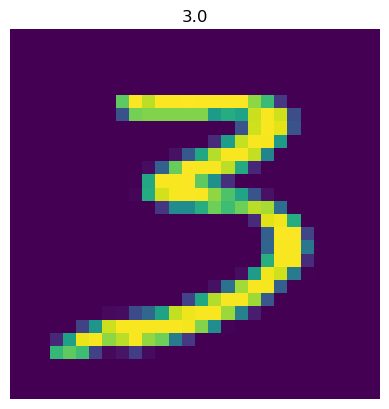

In [16]:
plt.imshow(features_numpy[25].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[25]))
plt.savefig('graph.png')
plt.show()

- `LogisticRegressionModel(nn.Module)`: `LogisticRegressionModel` sinifi, `nn.Module` sinifindan kalitim alir. Böylece PyTorch modülü oluşturulur.

- `def __init__(self, input_dim, output_dim):`: İnit metodu, sinifin başlatici metodudur. Bu metod, sinif bir örneği oluşturulduğunda çağrilir. `input_dim` ve `output_dim` parametreleri, modelin girdi ve çikti boyutlarini belirtir.

    - `self.linear = nn.Linear(input_dim, output_dim)`: `nn.Linear` sinifi kullanilarak bir lineer dönüşüm tanimlanir. Bu dönüşüm, girdi boyutunu (`input_dim`) çikti boyutuna (`output_dim`) dönüştürür. Lineer dönüşüm, modelin lineer kismini temsil eder.

- `def forward(self, x):`: `forward` metodu, PyTorch modelinin ileri geçişini (forward pass) belirtir. Bu metod, modelin girdi verisini nasil işleyeceğini belirler.

    - `out = self.linear(x)`: Girdi verisi (`x`), lineer dönüşüme (`self.linear`) uygulanir ve çikti (`out`) elde edilir.
    
    - `return out`: Elde edilen çikti (`out`), yöntemin çikişi olarak döndürülür.

Bu kod parçaciği, lojistik regresyon modelini tanimlayan ve ileri geçişi gerçekleştiren bir PyTorch modülünü oluşturur. Ancak, lojistik fonksiyon bu kodda tanimlanmaz, çünkü PyTorch'ta lojistik fonksiyon kayip fonksiyonu içinde bulunur ve bu işlem sonraki adimlarda gerçekleştirilir.

In [31]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out

- Giris ve çikis boyutu belirleme

In [32]:
input_dim = 28*28 # resim boyutu px*px
output_dim = 10  # etiketler 0,1,2,3,4,5,6,7,8,9

- Lojistik regresyon modelinin oluşturulmasi

In [33]:
model = LogisticRegressionModel(input_dim, output_dim)

Cross Entropy Loss, bir siniflandirma problemi için kullanilan bir kayip fonksiyonudur. Yani, modelimizin ne kadar iyi veya kötü performans gösterdiğini ölçmemize yardimci olur.

Örneğin, bir sinifin tahmin edilmesi gereken çok sayida sinif varsa. Örneğin, el yazisi rakamlari tanimak için bir model kullaniyorsak, 0'dan 9'a kadar olan 10 farkli rakam sinifini tahmin etmemiz gerekebilir.

Cross Entropy Loss, modelin tahminlerini gerçek etiketlerle karşilaştirir ve bu tahminlerin doğruluğunu değerlendirir. Doğruluk arttikça, kayip (loss) değeri azalir ve modelin performansi iyileşir.

Özetle, Cross Entropy Loss, modelin tahminlerinin gerçek etiketlere ne kadar yakin olduğunu hesaplar ve modelin doğruluğunu ölçer. Yani, modelin ne kadar iyi öğrendiğini ve doğru tahminler yapabildiğini anlamamiza yardimci olur.

In [34]:
error = nn.CrossEntropyLoss()

- **Learning Rate (Öğrenme Orani):**
    - Learning rate, bir yapay sinir aği modelinin ne kadar hizli veya yavaş öğrendiğini belirleyen bir değerdir.
    - Yapay sinir aği, veri üzerindeki hatalari azaltmak ve doğru tahminler yapabilmek için öğrenir.
    - Öğrenme orani, bu öğrenme sürecinin ne kadar hizli veya yavaş olacağini belirler. Yani, her adimda modelin güncellenme miktarini belirler.
    - Eğer öğrenme orani çok küçükse, model yavaş öğrenir ve eğitim daha uzun sürebilir. Eğer çok büyükse, model hizli öğrenir ancak doğru sonuçlara ulaşamaz.
    - Öğrenme orani, genellikle deneme yanilma yöntemiyle ayarlanir. Yani, farkli öğrenme oranlarini deneyerek en iyi sonucu elde etmeye çalişiriz.

- **SGD Optimizer (Stokastik Gradyan Azaltma):**
    - SGD, modelin parametrelerini güncellemek için kullanilan bir optimizasyon algoritmasidir.
    - SGD, modelin eğitim veri setindeki hatalari azaltmak için gradyan inişini kullanir.
    - Gradyan inişi, modelin parametrelerini, kaybi (loss) azaltacak şekilde güncellemek için gradyanin (eğim) tersine doğru ilerler.
    - Stokastik kelimesi, her bir eğitim örneği için gradyan hesaplamasinin rastgele (stokastik) olarak yapildiğini ifade eder. Yani, her adimda bir eğitim örneği alinir ve gradyan hesaplanir.
    - SGD, eğitim sürecini hizlandirabilir ve bellek kullanimini azaltabilir. Ancak, bazen düzgün çalişmayabilir veya daha karmaşik problemler için yetersiz olabilir.
    - PyTorch'ta SGD optimizerini kullanarak, modelin parametrelerini güncelleyebilir ve eğitim sürecini optimize edebiliriz.

In [35]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

- **Eğitim Süreci (Training the Model):**
    - Bu adimda, modelimizi eğitmek için bir döngü başlatiyoruz. Her bir döngü, bir 'epoch' (tüm eğitim veri setindeki verilerin bir kez geçildiği süre) için bir kez çalişir.
    - İlk olarak, eğitim veri yükleyicisinden (train_loader) bir döngüyle görüntüleri (images) ve etiketleri (labels) aliriz.
    - Daha sonra, görüntülerimizi modelimizin girdi boyutuna uygun hale getiririz ve değişkenlere (Variable) dönüştürürüz.
    - Optimizerin gradyanlari sifirlamasi gerekir, bu nedenle `optimizer.zero_grad()` kullanarak gradyanlari sifirlariz.
    - Modelimize girdileri (images) iletecek ve çiktilari (outputs) elde edeceğiz.
    - Çiktilari ve etiketleri kullanarak, softmax ve çapraz entropi kaybini hesaplariz.
    - Gradyanlari hesaplar ve modelin parametrelerini güncelleriz.
    - Doğruluk (accuracy) hesaplamak için test veri setindeki performansimizi değerlendiririz. Test veri yükleyicisinden (test_loader) görüntüleri aliriz, modelimizden tahminler yapariz ve doğru tahminleri sayariz.
    - Eğitim ilerledikçe, kayip (loss) ve doğruluk değerlerini kaydederek eğitim sürecinin nasil ilerlediğini izleriz.
    - Belirli araliklarla, her bir iterasyonda (adim) kayip değerini ve doğruluk oranini yazdiririz. Bu, modelin ne kadar hizli öğrendiğini ve ne kadar doğru tahminler yaptiğini görmemize olanak sağlar.

In [36]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)

        loss = error(outputs, labels)

        loss.backward()

        optimizer.step()
        
        count += 1

        if count % 50 == 0:   
            correct = 0
            total = 0
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            print(f'Iteration: {count}  Loss: {loss.data}  Accuracy: {accuracy}%')

Iteration: 500  Loss: 0.7692509293556213  Accuracy: 84.08333587646484%
Iteration: 1000  Loss: 0.6768711805343628  Accuracy: 85.8452377319336%
Iteration: 1500  Loss: 0.4276704490184784  Accuracy: 87.14286041259766%
Iteration: 2000  Loss: 0.4911549687385559  Accuracy: 87.45237731933594%
Iteration: 2500  Loss: 0.4463575780391693  Accuracy: 87.95237731933594%
Iteration: 3000  Loss: 0.26041722297668457  Accuracy: 88.20237731933594%
Iteration: 3500  Loss: 0.4022088944911957  Accuracy: 88.57142639160156%
Iteration: 4000  Loss: 0.24480704963207245  Accuracy: 88.9047622680664%
Iteration: 4500  Loss: 0.599754273891449  Accuracy: 89.07142639160156%
Iteration: 5000  Loss: 0.34372982382774353  Accuracy: 89.38095092773438%
Iteration: 5500  Loss: 0.37488192319869995  Accuracy: 89.47618865966797%
Iteration: 6000  Loss: 0.49544134736061096  Accuracy: 89.67857360839844%
Iteration: 6500  Loss: 0.28889113664627075  Accuracy: 89.64286041259766%
Iteration: 7000  Loss: 0.3772866725921631  Accuracy: 89.761901

### Model değerlendirme

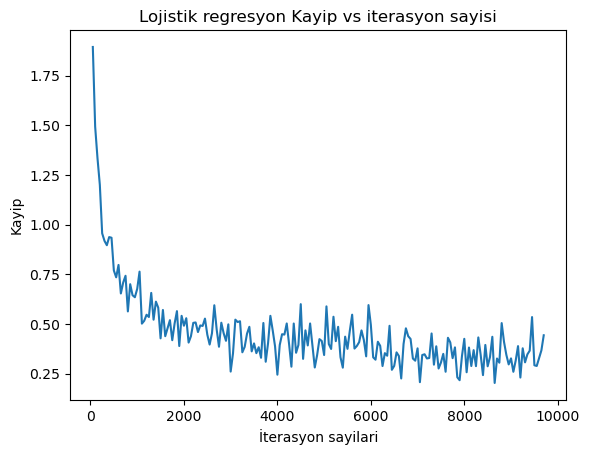

In [37]:
plt.plot(iteration_list,loss_list)
plt.xlabel("İterasyon sayilari")
plt.ylabel("Kayip")
plt.title("Lojistik regresyon Kayip vs iterasyon sayisi")
plt.show()

### Dışardaki bir görüntüden Sınıf tahmini

In [ ]:

from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

image_path = "img/2.jpg"
image = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),  # Resmi siyah beyaza dönüştürme
    transforms.ToTensor(),   # Görüntüyü tensöre dönüştürme ve normalizasyon
])
image = preprocess(image)

image = image.view(-1, 28*28)

# Görüntüyü modele verme
output = model(image)

# Tahminleri almak için softmax kullanma
probabilities = F.softmax(output, dim=1)

# En yüksek olasılığa sahip sınıfı belirleme
predicted_class = torch.argmax(probabilities)

print("Tahmin edilen sınıf:", predicted_class.item())


In [ ]:
probabilities

### Real-Time predictions

In [ ]:
import cv2
cap = cv2.VideoCapture(0)


In [ ]:
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])


In [ ]:
while True:
    ret, frame = cap.read()

    input_image = preprocess(frame).view(-1, 28*28)
    
    with torch.no_grad():
        output = model(input_image)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities)

    cv2.putText(frame, str(predicted_class.item()), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Real-time Prediction', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()